### loan_result 데이터 살피기

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
from pandas import Series, DataFrame
pd.options.display.float_format="{:.5f}".format

In [4]:
loan_path = "/data/loan_result.csv"
loan_df = pd.read_csv(loan_path)

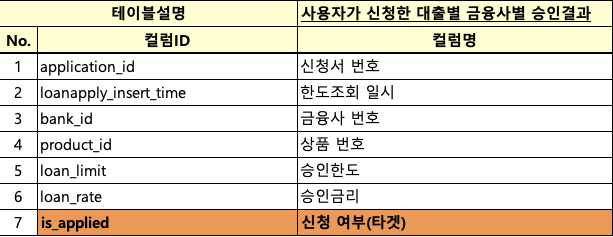

In [5]:
# 처음 5개 행 추출
loan_df.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [6]:
# 테이블 정보
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB


In [7]:
# 테이블 형태
loan_df.shape

(13527363, 7)

In [8]:
# column별 null값의 개수
loan_df.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

In [9]:
# 테이블 통계량 요약
loan_df.describe()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied
count,1.352736e+07,1.352736e+07,1.352736e+07,1.351987e+07,1.351987e+07,1.027012e+07
mean,1.083520e+06,3.259900e+01,1.464136e+02,2.274095e+07,1.275172e+01,5.457081e-02
std,6.260518e+05,1.725680e+01,7.866002e+01,7.221901e+07,3.843386e+00,2.271406e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.500000e+00,0.000000e+00
25%,5.415640e+05,1.900000e+01,7.100000e+01,9.000000e+06,9.600000e+00,0.000000e+00
50%,1.083953e+06,3.400000e+01,1.500000e+02,1.800000e+07,1.320000e+01,0.000000e+00
75%,1.625316e+06,4.600000e+01,2.170000e+02,3.300000e+07,1.560000e+01,0.000000e+00
max,2.167826e+06,6.400000e+01,2.700000e+02,2.308000e+11,2.000000e+01,1.000000e+00


#### [application_id] EDA

In [23]:
# application_id 종류 개수 , type 출력
print(len(loan_df.groupby('application_id').count()), loan_df['application_id'].dtype)

968866 int64


#### [loanapply_insert_time] EDA

In [30]:
# loanapply_insert_time 종류 개수, type 출력
print(len(loan_df.groupby('loanapply_insert_time').count()), loan_df['loanapply_insert_time'].dtype)

3220564 object


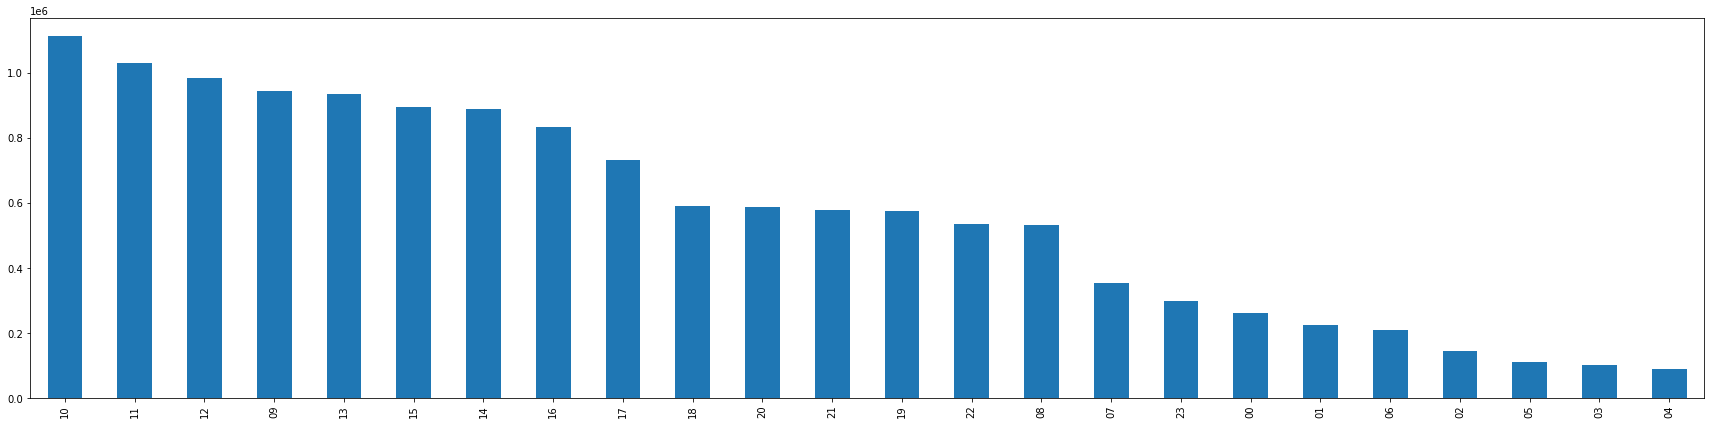

In [33]:
# loanapply_insert_time 시간별 데이터 분포도
time_df = loan_df[loan_df['loanapply_insert_time'].isna() == False]['loanapply_insert_time'].astype(str).apply(lambda x : x[11:13])
plt.figure(figsize=(30, 7))
time_df.value_counts().plot.bar()

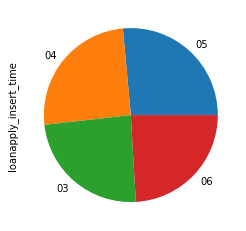

In [34]:
# loanapply_insert_time 월별 데이터 분포도
month_df = loan_df[loan_df['loanapply_insert_time'].isna() == False]['loanapply_insert_time'].astype(str).apply(lambda x : x[5:7])
month_df.value_counts().plot.pie()

#### [bank_id] EDA

In [29]:
# bank_id 종류 개수, type 출력
print(len(loan_df.groupby('bank_id').count()), loan_df['bank_id'].dtype)

63 int64


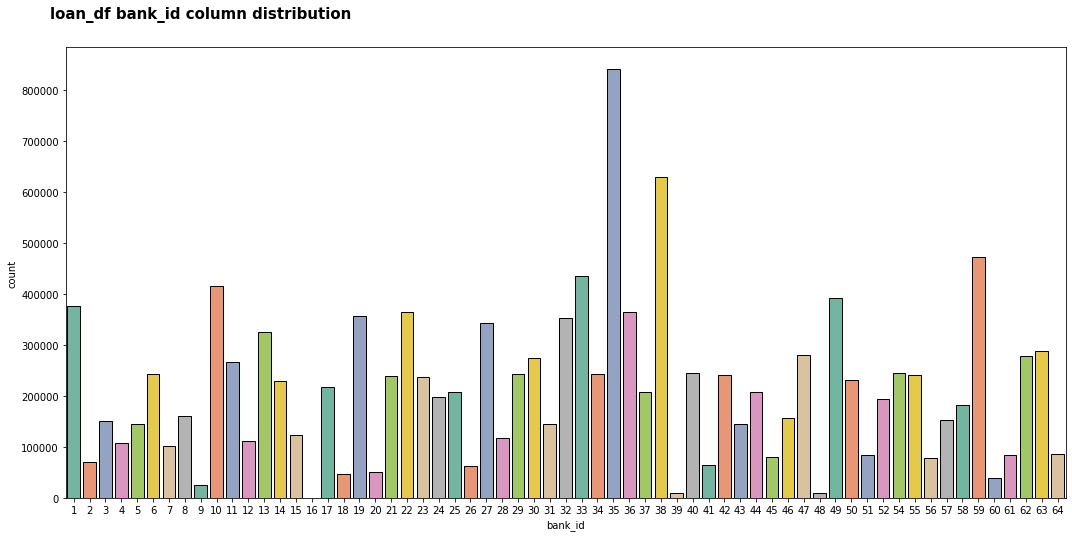

In [36]:
# bank_id 종류별 분포도 -> (은행별 신청서 발급 분포도 확인)

fig, axes = plt.subplots(1,1, figsize=(15, 7), sharey=True)

sns.countplot(x='bank_id', data=loan_df, palette="Set2", edgecolor='black')  
plt.suptitle('loan_df bank_id column distribution', 
             fontsize=15, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left'
            ) 

plt.tight_layout()
plt.show()

#### [product_id] EDA

In [28]:
# product_id 종류 개수, type 출력
print(len(loan_df.groupby('product_id').count()), loan_df['product_id'].dtype)

188 int64


#### [loan_limit] EDA

In [27]:
# loan_limit 종류 개수, type 출력
print(len(loan_df.groupby('loan_limit').count()), loan_df['loan_limit'].dtype)

646 float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


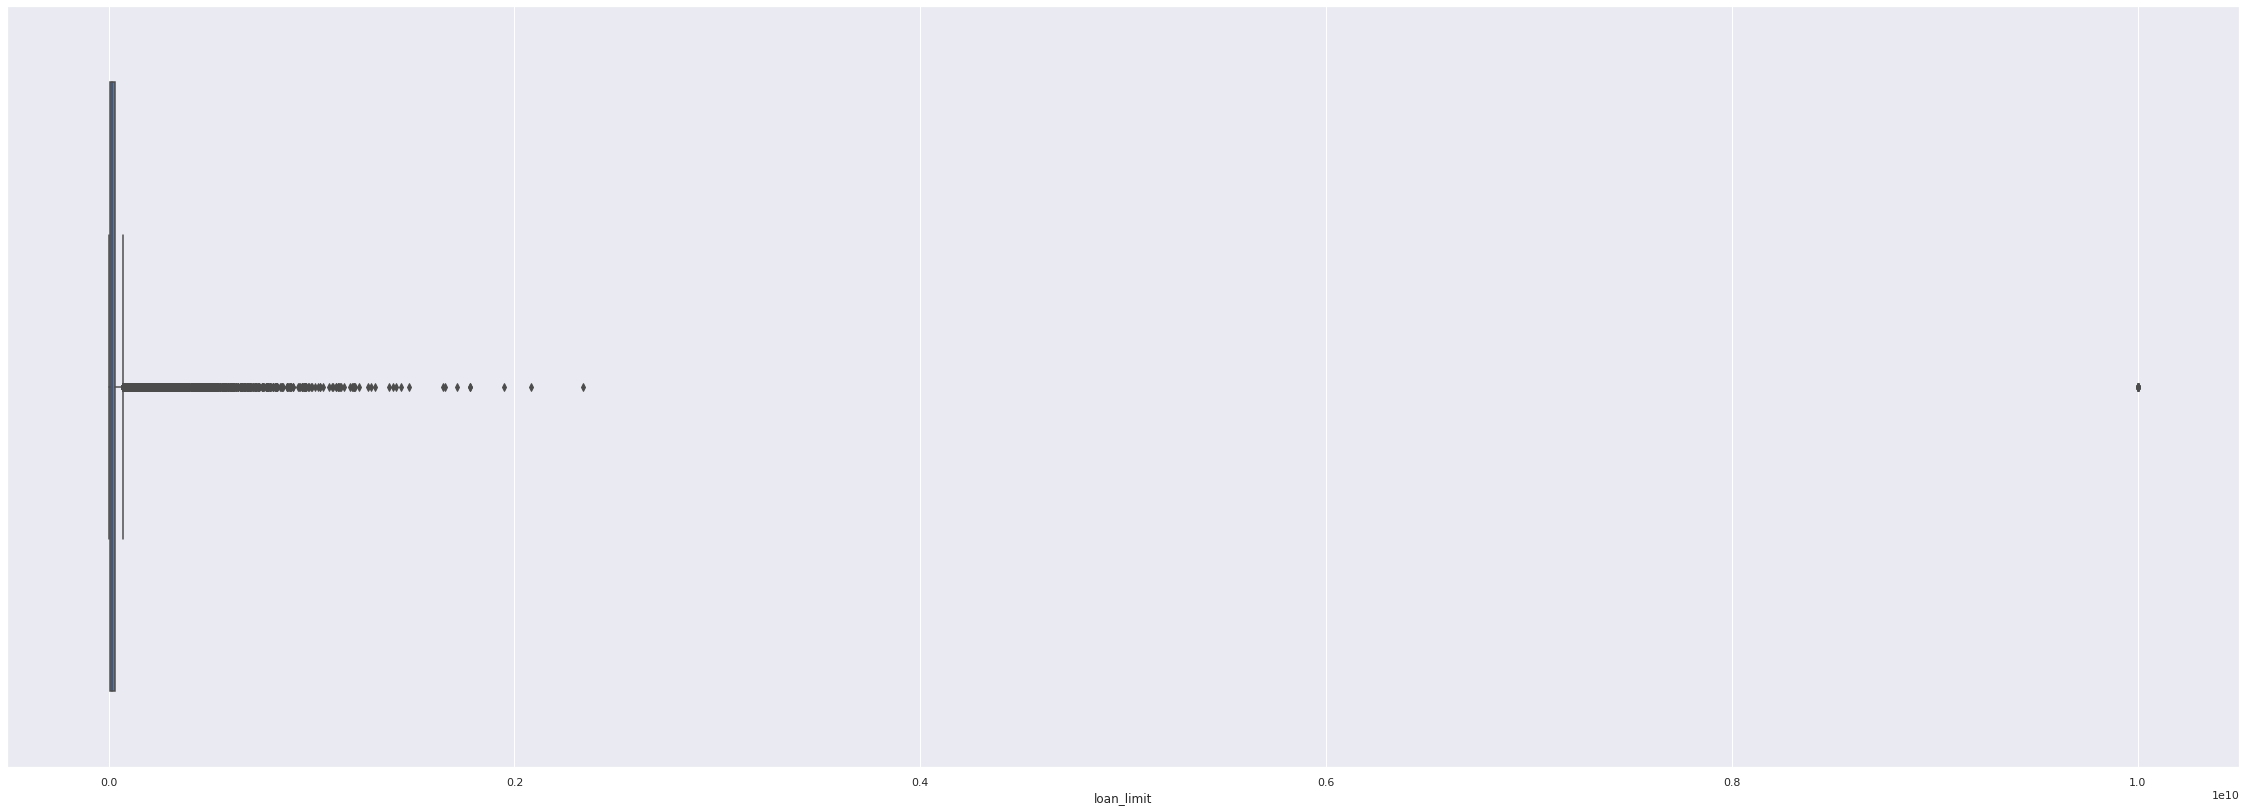

In [77]:
# 이상치 확인
sns.boxplot(loan_df['loan_limit'])

In [76]:
# 분포도 확인
loan_df.groupby('loan_limit').count()

,application_id,loanapply_insert_time,bank_id,product_id,loan_rate,is_applied
loan_limit,,,,,,
0.00000,4970,4970,4970,4970,4970,4970
1000000.00000,94027,94027,94027,94027,94027,94027
2000000.00000,197276,197276,197276,197276,197276,197276
3000000.00000,955707,955707,955707,955707,955707,955707
4000000.00000,125338,125338,125338,125338,125338,125338
...,...,...,...,...,...,...
1783000000.00000,1,1,1,1,1,1
1947000000.00000,1,1,1,1,1,1
2083000000.00000,1,1,1,1,1,1


#### [loan_rate] EDA

In [26]:
# loan_rate 종류 개수, type 출력
print(len(loan_df.groupby('loan_rate').count()), loan_df['loan_rate'].dtype)

173 float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


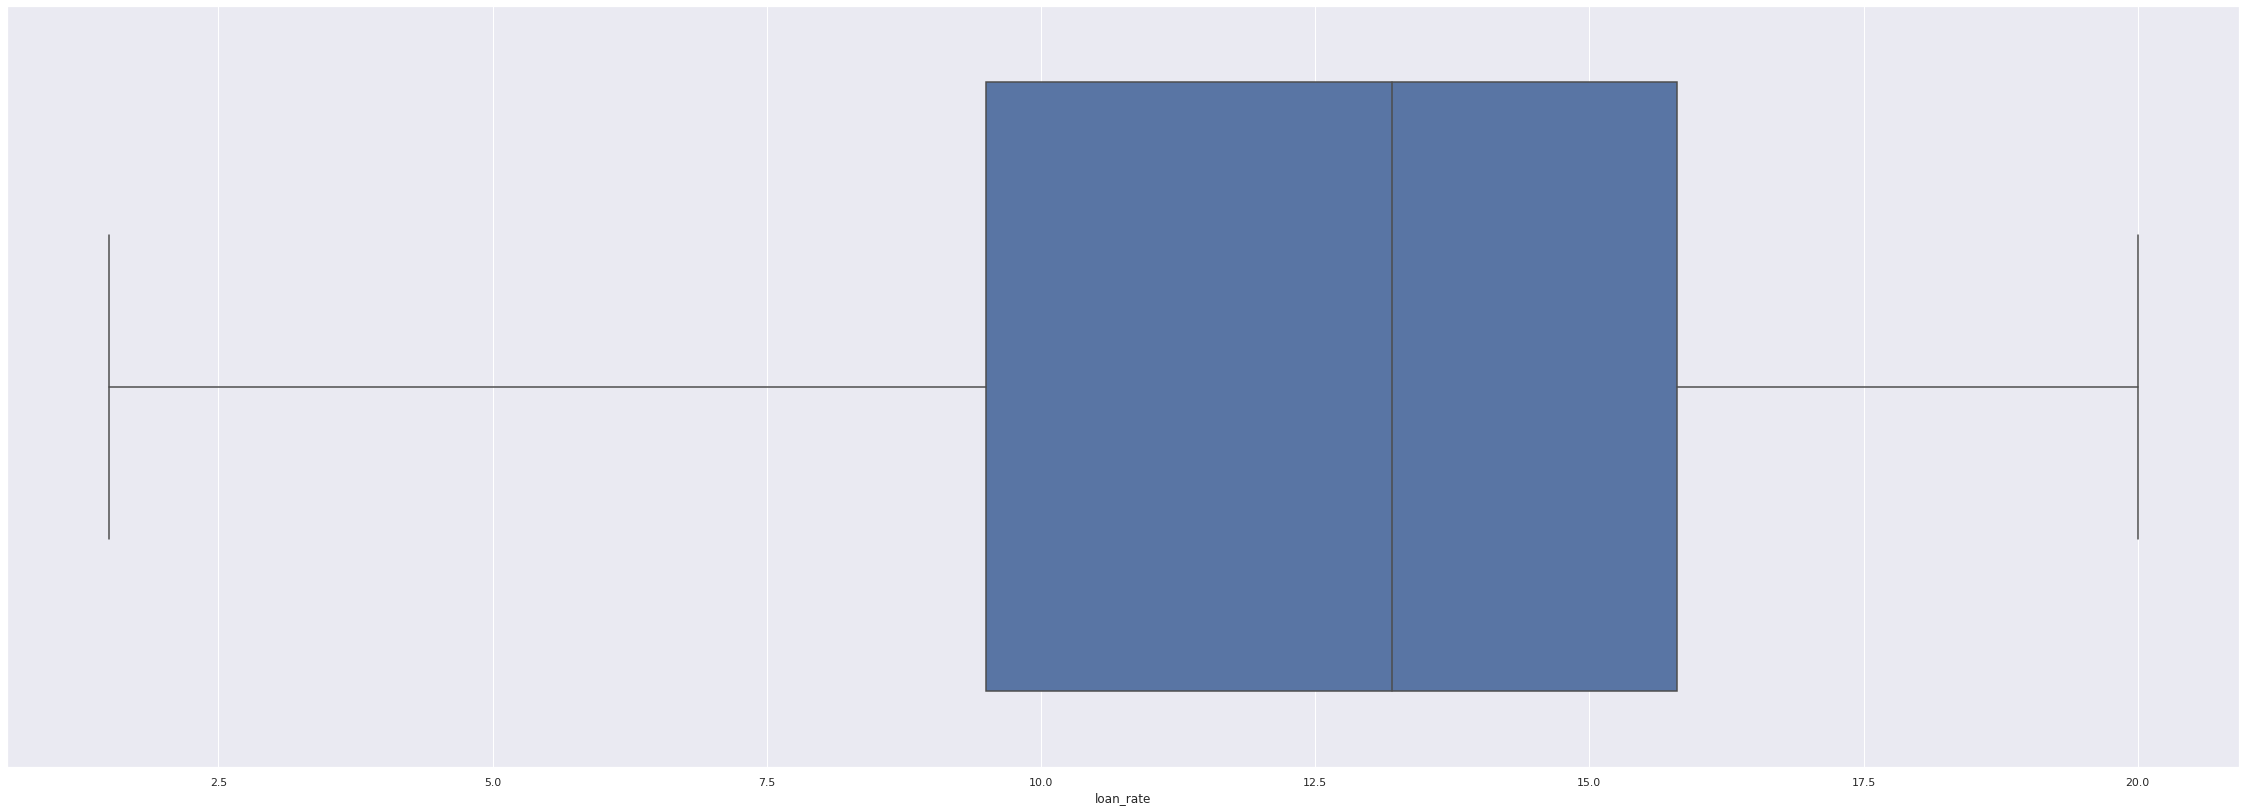

In [78]:
# 이상치 확인
sns.boxplot(loan_df['loan_rate'])

#### [is_applied] EDA

In [25]:
# is_applied 종류 개수, type 출력
print(len(loan_df.groupby('is_applied').count()), loan_df['is_applied'].dtype)

2 float64


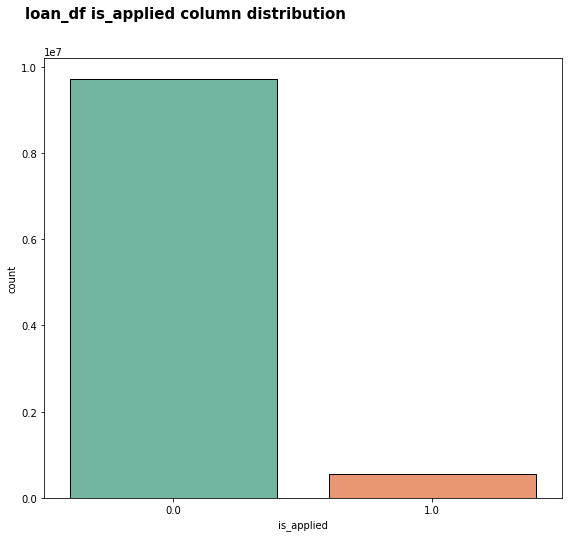

In [37]:
# is_applied 종류별 분포도 -> (예측 column)

fig, axes = plt.subplots(1,1, figsize=(8, 7), sharey=True)

sns.countplot(x='is_applied', data=loan_df, palette="Set2", edgecolor='black')  
plt.suptitle('loan_df is_applied column distribution', 
             fontsize=15, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

In [56]:
# is_applied 1, 0 개수 확인
loan_df.groupby('is_applied').count()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate
is_applied,,,,,,
0.0,9709675,9709675,9709675,9709675,9709675,9709675
1.0,560449,560449,560449,560449,554711,554711


#### 상관관계 파악

In [61]:
#  is_applied 가 Nan 제거, train data만
loan_df = loan_df.dropna(subset = ['is_applied'])

In [62]:
# is_applied null값 제거한 후 null값 확인
loan_df.isnull().sum()

application_id              0
loanapply_insert_time       0
bank_id                     0
product_id                  0
loan_limit               5738
loan_rate                5738
is_applied                  0
dtype: int64

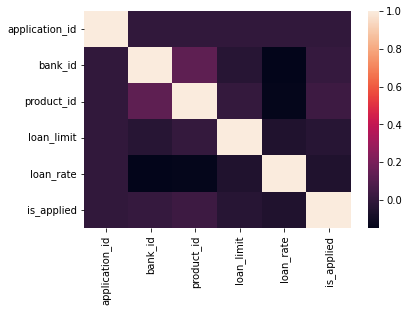

In [63]:
# heatmap으로 컬럼 간의 상관계수 확인
loan_cor = loan_df.corr()
sns.heatmap(loan_cor)

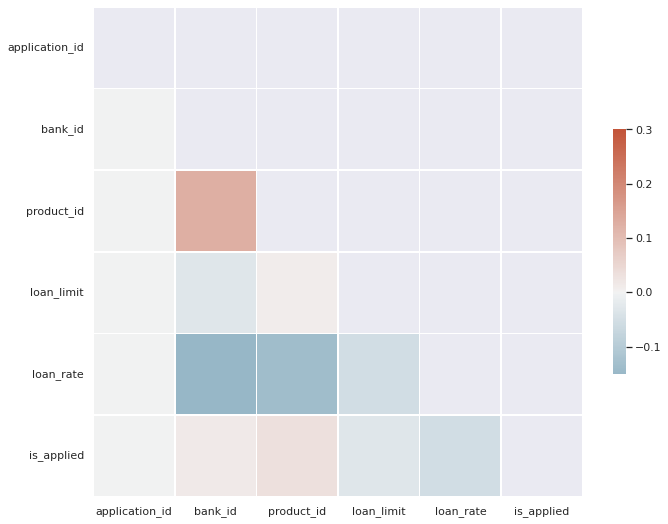

In [79]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(loan_df.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(loan_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(rotation=0)
plt.show()

In [80]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270124 entries, 13284 to 13519638
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 626.8+ MB


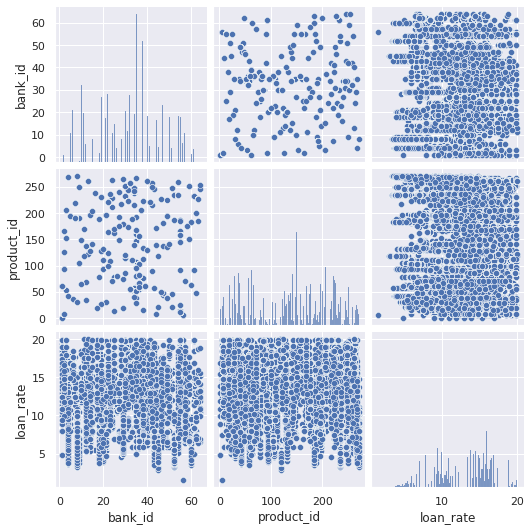

In [82]:
# 관련있는 컬럼만 산점도로 확인
sns.pairplot(data=loan_df[['bank_id','product_id','loan_rate']])
plt.show()

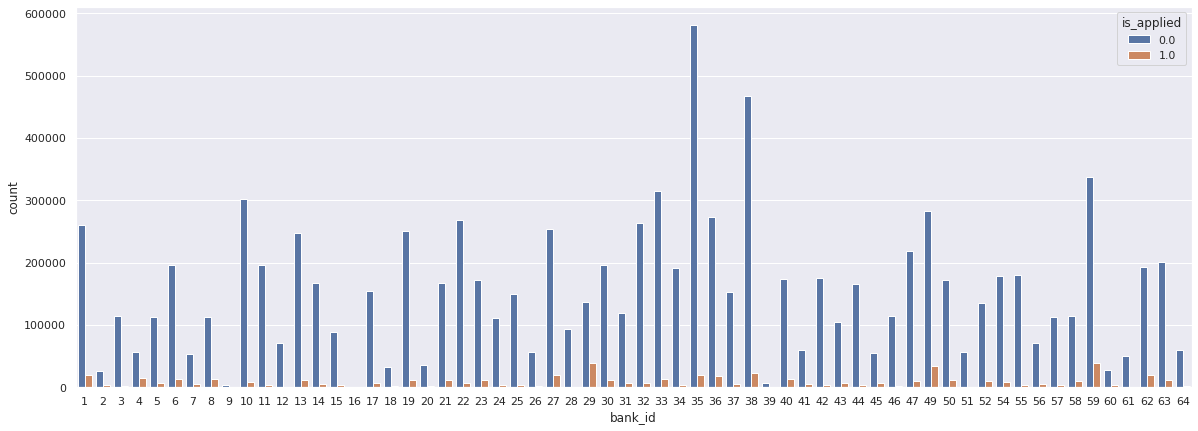

In [72]:
# 은행별 is_applied 확인
sns.countplot(x='bank_id', data=loan_df, hue='is_applied')
sns.set(rc={'figure.figsize':(40,14)})
plt.show()